In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("pharm_stock.csv")
df.shape

(137, 37)

In [3]:
df.columns

Index(['종목명', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금', '전일거래량',
       '조회일자', '종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
       '외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
       'PERlEPS(2020.06)', '추정PERlEPS', 'PBRlBPS (2020.06)', '배당수익률',
       '동일업종 PER', '동일업종 등락률', '배당수익률l2019.12', 'PERlEPS(2019.12)',
       'PBRlBPS (2019.12)', 'PERlEPS(2020.03)', 'PBRlBPS (2020.03)',
       'PERlEPS(2018.12)', 'PBRlBPS (2018.12)', '배당수익률l2020.06',
       'PERlEPS(2020.08)', 'PBRlBPS (2020.08)', '배당수익률l2019.11'],
      dtype='object')

## 데이터 전처리
###  데이터 타입 변경
* 시가총액 데이터 수치형태로 변경하기

In [4]:
df["시가총액(억원)"] = df["시가총액"].str.split("억원", expand=True)[0]
df[["시가총액", "시가총액(억원)", '시가총액순위']].head()

,시가총액,시가총액(억원),시가총액순위
0,"1,770 억원","1,770",코스닥 430위
1,66 억원,66,코스피 1447위
2,"1조 3,203 억원","1조 3,203",코스닥 28위
3,972 억원,972,코스닥 763위
4,"7조 1,795 억원","7조 1,795",코스피 37위


### 파생변수 만들기
* 코스피/코스닥 구분 만들기
* 시가총액 순위 분리하기
* 액면가l매매단위
* 52주최고l최저

In [5]:
df["코스피/코스닥"] = df['시가총액순위'].str.split(" ", expand=True)[0]
df["시가총액순위(전처리)"] = df['시가총액순위'].str.split(" ", expand=True)[1]
df[["시가총액", "시가총액(억원)", '시가총액순위', '코스피/코스닥', '시가총액순위(전처리)']].head()

,시가총액,시가총액(억원),시가총액순위,코스피/코스닥,시가총액순위(전처리)
0,"1,770 억원","1,770",코스닥 430위,코스닥,430위
1,66 억원,66,코스피 1447위,코스피,1447위
2,"1조 3,203 억원","1조 3,203",코스닥 28위,코스닥,28위
3,972 억원,972,코스닥 763위,코스닥,763위
4,"7조 1,795 억원","7조 1,795",코스피 37위,코스피,37위


In [6]:
df["액면가"] = df['액면가l매매단위'].str.split("  l  ", expand=True)[0]
df["매매단위"] = df['액면가l매매단위'].str.split("  l  ", expand=True)[1]
df["액면가"] = df["액면가"].str.replace("원", "")
df["액면가"] = df["액면가"].str.replace(",", "")

In [7]:
df["시가총액순위(전처리)"] = df["시가총액순위(전처리)"].str.replace("위", "").astype(int)

In [8]:
df["52주최고"] = df["52주최고l최저"].str.split("  l  ", expand=True)[0]
df["52주최저"] = df["52주최고l최저"].str.split("  l  ", expand=True)[1]

In [9]:
df["52주최고(int)"] = df["52주최고"].str.replace(",", "").astype(int)
df["52주최저(int)"] = df["52주최저"].str.replace(",", "").astype(int)

df["52주차액"] = df["52주최고(int)"] - df["52주최저(int)"]
df["52주차액비율"] = df["52주최고(int)"] / df["52주최저(int)"]

df["현재-최고가"] = df["현재가"] - df["52주최고(int)"]
df["현재/최고가비율"] =  df["현재가"] / df["52주최고(int)"] 


df[['종목명', '현재가','코스피/코스닥', "52주최고(int)", "52주최저(int)", "52주차액", "52주차액비율", "현재/최고가비율"]].sort_values(
    "52주차액비율", ascending=False).head(30)

,종목명,현재가,코스피/코스닥,52주최고(int),52주최저(int),52주차액,52주차액비율,현재/최고가비율
6,신풍제약우,153500.0,코스피,280000,5510,274490,50.816697,0.548214
4,신풍제약,135500.0,코스피,214000,6100,207900,35.081967,0.633178
136,녹십자홀딩스2우,141000.0,코스피,287000,12350,274650,23.238866,0.491289
40,신일제약 *,24650.0,코스닥,58100,4500,53600,12.911111,0.424269
13,일양약품우,91000.0,코스피,167000,15600,151400,10.705128,0.544910
122,유나이티드제약,49100.0,코스피,112000,10750,101250,10.418605,0.438393
56,메드팩토 *,119800.0,코스닥,134200,14675,119525,9.144804,0.892697
10,메디포럼제약 *,17800.0,코스닥,21500,2665,18835,8.067542,0.827907
117,우리들제약,14150.0,코스피,33650,4290,29360,7.843823,0.420505
116,동화약품,20100.0,코스피,34450,4800,29650,7.177083,0.583454


### 서브셋 만들기
* 서브셋 만들기
* 정렬하기

In [10]:
cols = ['종목명', '현재가', "현재-최고가", "현재/최고가비율", "52주최고(int)", "52주최저(int)", "52주차액", "52주차액비율"]
코스피 = df[df["코스피/코스닥"] == "코스피"].sort_values("시가총액순위(전처리)")
코스피[cols].head(20)

,종목명,현재가,현재-최고가,현재/최고가비율,52주최고(int),52주최저(int),52주차액,52주차액비율
66,삼성바이오로직스,688000.0,-175000.0,0.797219,863000,352000,511000,2.451705
112,셀트리온,244000.0,-95500.0,0.718704,339500,138500,201000,2.451264
12,SK바이오팜,161500.0,-108000.0,0.599258,269500,98000,171500,2.750000
4,신풍제약,135500.0,-78500.0,0.633178,214000,6100,207900,35.081967
91,유한양행,60600.0,-14400.0,0.808000,75000,37500,37500,2.000000
69,한미사이언스,59200.0,-14800.0,0.800000,74000,18950,55050,3.905013
87,한미약품,273000.0,-157000.0,0.634884,430000,213500,216500,2.014052
128,녹십자,219500.0,-98500.0,0.690252,318000,97400,220600,3.264887
79,종근당,163500.0,-61500.0,0.726667,225000,60900,164100,3.694581
19,부광약품,27200.0,-19350.0,0.584318,46550,12350,34200,3.769231


In [11]:
코스피[cols].sort_values("현재-최고가", ascending=True).head(20)

,종목명,현재가,현재-최고가,현재/최고가비율,52주최고(int),52주최저(int),52주차액,52주차액비율
66,삼성바이오로직스,688000.0,-175000.0,0.797219,863000,352000,511000,2.451705
87,한미약품,273000.0,-157000.0,0.634884,430000,213500,216500,2.014052
136,녹십자홀딩스2우,141000.0,-146000.0,0.491289,287000,12350,274650,23.238866
6,신풍제약우,153500.0,-126500.0,0.548214,280000,5510,274490,50.816697
12,SK바이오팜,161500.0,-108000.0,0.599258,269500,98000,171500,2.750000
11,JW중외제약2우B,69000.0,-106500.0,0.393162,175500,29150,146350,6.020583
128,녹십자,219500.0,-98500.0,0.690252,318000,97400,220600,3.264887
112,셀트리온,244000.0,-95500.0,0.718704,339500,138500,201000,2.451264
4,신풍제약,135500.0,-78500.0,0.633178,214000,6100,207900,35.081967
13,일양약품우,91000.0,-76000.0,0.544910,167000,15600,151400,10.705128


In [12]:
kospi_corr = 코스피.corr().dropna(how="all", axis=0).dropna(how="all", axis=1)
kospi_corr

,현재가,전일비,매수호가,매도호가,거래량,거래대금,전일거래량,종목코드,상장주식수,외국인한도주식수(A),외국인보유주식수(B),시가총액순위(전처리),52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율
현재가,1.000000,0.384273,0.999999,0.999999,-0.084896,0.230904,-0.124831,0.290341,0.002694,0.002694,0.225941,-0.274996,0.984363,0.934201,0.918579,0.135153,-0.816855,0.104550
전일비,0.384273,1.000000,0.384256,0.384692,0.065719,0.325022,-0.041750,0.008075,-0.108265,-0.108265,-0.078318,0.084985,0.481877,0.143402,0.643304,0.619012,-0.653191,-0.280711
매수호가,0.999999,0.384256,1.000000,0.999999,-0.085091,0.230638,-0.124755,0.290425,0.002758,0.002758,0.226170,-0.275310,0.984362,0.934420,0.918443,0.134628,-0.816855,0.104728
매도호가,0.999999,0.384692,0.999999,1.000000,-0.085128,0.230877,-0.124973,0.290297,0.002537,0.002537,0.225985,-0.275027,0.984467,0.934345,0.918649,0.134999,-0.817199,0.104467
거래량,-0.084896,0.065719,-0.085091,-0.085128,1.000000,0.565359,0.707415,-0.118815,0.523354,0.523354,0.286141,-0.207051,-0.088252,-0.155613,-0.038031,0.225263,0.084685,-0.106495
거래대금,0.230904,0.325022,0.230638,0.230877,0.565359,1.000000,0.279939,0.023930,0.132125,0.132125,0.300845,-0.256604,0.251942,0.082813,0.331508,0.474440,-0.269333,-0.026355
전일거래량,-0.124831,-0.041750,-0.124755,-0.124973,0.707415,0.279939,1.000000,-0.154209,0.668409,0.668409,0.445291,-0.256912,-0.138464,-0.150637,-0.117351,0.035555,0.153006,-0.155830
종목코드,0.290341,0.008075,0.290425,0.290297,-0.118815,0.023930,-0.154209,1.000000,-0.033470,-0.033470,-0.047905,-0.267057,0.272291,0.330117,0.209867,-0.137763,-0.192925,0.230966
상장주식수,0.002694,-0.108265,0.002758,0.002537,0.523354,0.132125,0.668409,-0.033470,1.000000,1.000000,0.612456,-0.307597,-0.030175,0.024108,-0.060692,-0.096847,0.105295,-0.094921
외국인한도주식수(A),0.002694,-0.108265,0.002758,0.002537,0.523354,0.132125,0.668409,-0.033470,1.000000,1.000000,0.612456,-0.307597,-0.030175,0.024108,-0.060692,-0.096847,0.105295,-0.094921


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="AppleGothic", rc={"axes.unicode_minus":False})

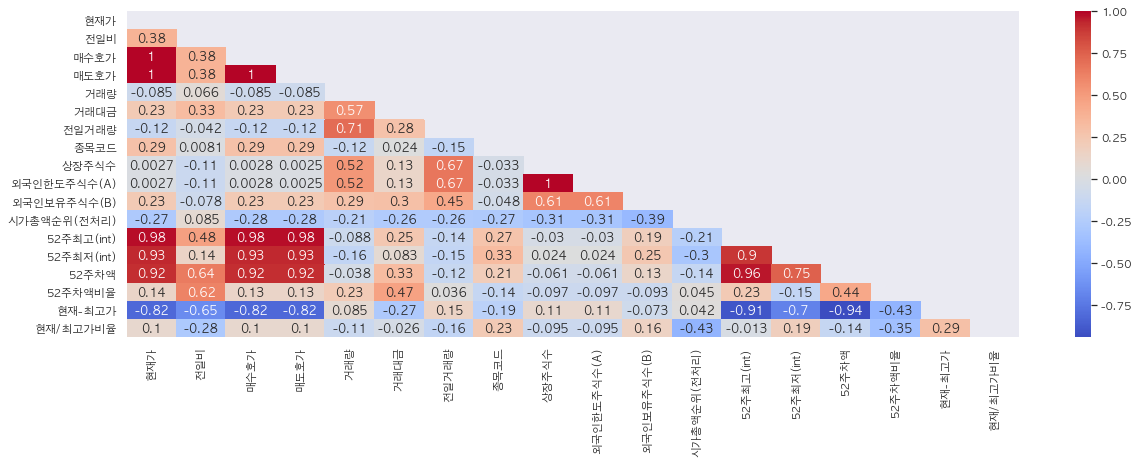

In [14]:
mask = np.triu(np.ones_like(kospi_corr, dtype=bool))
plt.figure(figsize=(20, 6))
sns.heatmap(kospi_corr, cmap="coolwarm", annot=True, mask=mask)

In [15]:
num_desc = 코스피.set_index("종목명").describe()
num_cols = num_desc.columns.tolist()
num_cols.append("종목명")

In [16]:
item_corr = 코스피[num_cols].set_index("종목명").T.corr()

In [17]:
item_corr["신풍제약"].sort_values()

종목명
JW중외제약2우B    0.294188
JW중외제약우      0.739603
유유제약2우B      0.874437
일양약품우        0.901666
녹십자홀딩스2우     0.904284
신풍제약우        0.985183
동아에스티        0.991711
유한양행우        0.991998
광동제약         0.993497
유유제약1우       0.993886
유한양행         0.995032
셀트리온         0.995500
삼진제약         0.995744
일성신약         0.996120
대원제약         0.996721
녹십자          0.996843
하나제약         0.996856
현대약품         0.996877
환인제약         0.996884
이연제약         0.997279
일동홀딩스        0.997306
경보제약         0.997316
유유제약         0.997463
한미약품         0.997463
한미사이언스       0.997549
우리들제약        0.997639
종근당홀딩스       0.997749
SK바이오팜       0.997841
삼일제약         0.997861
명문제약         0.997896
종근당          0.998066
종근당바이오       0.998097
에이프로젠제약      0.998104
동아쏘시오홀딩스     0.998175
삼성제약         0.998230
대웅제약         0.998230
국제약품         0.998273
제일약품         0.998363
한독           0.998371
동화약품         0.998427
JW홀딩스        0.998444
JW생명과학       0.998603
코스맥스비티아이     0.998624
삼성바이오로직스     0.998646
동성제약         0.998817
녹십자홀딩스